For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.
 

# 1. Has the network latency gone up since we switched internet service providers?


H₀ = The network latency has not changed or decreased since we switched internet service providers.

Hₐ = The network latency has increased since we switched internet service providers.


Type I error = I determine that the network latency has increased when it has actually stayed the same. <br>
True negative = I determine that the network latency has stayed the same and not decreased. <br>
True positive = I determine that the network latency has increased. <br>
Type II error = I determine that the network latency has stayed the same when it has actually increased.


# 2. Is the website redesign any good?


H₀ = The website design has no difference in sales.

Hₐ = There has been an increase in sales since redesigning the website.

Type I error = I determine that the number of sales has increased when it has actually has stayed the same. <br>
True negative = I determine that the number of sales has stayed. <br>
True positive = I determine that the number of sales has increased.  <br>
Type II error = I determine that the number of sales has stayed the same when it has actually increased. <br>


# 3. Is our television ad driving more sales?


H₀ = The TV ads has no difference in sales (stayed the same or decreased).

Hₐ = There has been an increase in sales since delivering the TV ads.

Type I error = I determine that the number of sales has increased when it has actually has stayed the same. <br>
True negative = I determine that the number of sales has stayed. <br>
True positive = I determine that the number of sales has increased.  <br>
Type II error = I determine that the number of sales has stayed the same when it has actually increased. <br>



## Questions from t-test lesson

Answer with the type of test you would use (assume normal distribution):

1. Is there a difference in grades of students on the second floor compared to grades of all students?
 - Are adults who drink milk taller than adults who dont drink milk?
 - Is the the price of gas higher in texas or in new mexico? 
 - Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

In [ ]:
# independent t-test: two sample t-test
# independent t-test: two sample t-test
# independent t-test: two sample t-test
# ANOVA 

2. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. <br> A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. <br> Use a .05 level of significance.

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from pydataset import data
import seaborn as sns

$H_0$: Average time to sell a house at office 1 == average time to sell at office 2 <br>
$H_a$: Average time to sell a house at office 1 ≠ average time to sell at office 2

In [2]:
𝜶 = 0.05

In [3]:
# using scipy to calculate t & p

t, p = stats.ttest_ind_from_stats(90, 15, 40, 100, 20, 50, equal_var=False)


t, p

(-2.7091418459143854, 0.00811206270346016)

In [4]:
if p < 𝜶:
    print("We reject the H₀")
else:
    print("We fail to reject the H₀")

We reject the H₀


Load the mpg dataset and use it to answer the following questions:

3. Is there a difference in fuel-efficiency in cars from 2008 vs 1999? <br>

In [5]:
mpg = data('mpg')

mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [6]:
mpg['fuel_efficiency'] = mpg[['cty', 'hwy']].mean(axis = 1)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_efficiency
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [7]:
fuel_2008 = mpg[mpg.year == 2008].fuel_efficiency
fuel_1999 = mpg[mpg.year == 1999].fuel_efficiency


$H_0$: There is no difference in fuel-efficiency in cars from 2008 and 1999<br>
$H_a$: There is a difference in fuel-efficiency in cars from 2008 and 1999

In [8]:
𝜶 = 0.05

<AxesSubplot:>

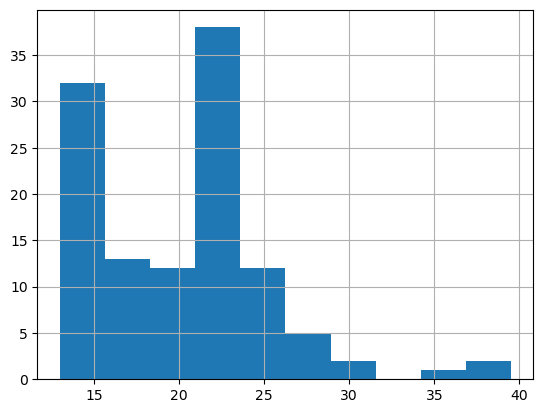

In [9]:
fuel_1999.hist()

<AxesSubplot:>

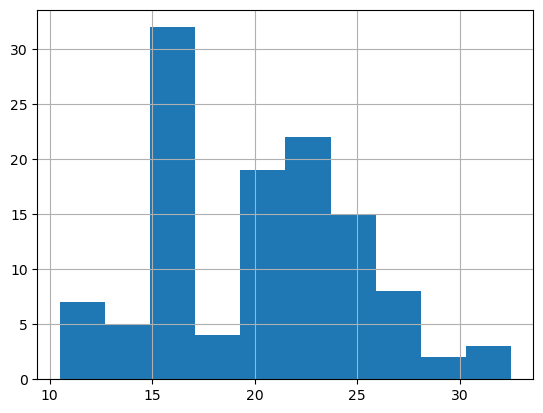

In [10]:
fuel_2008.hist()

In [11]:
fuel_2008.var(), fuel_1999.var()

(24.097480106100797, 27.122605363984682)

In [12]:
stats.levene(fuel_1999,fuel_2008)

LeveneResult(statistic=0.033228136671080453, pvalue=0.855517569468803)

In [13]:
t, p = stats.ttest_ind(fuel_2008, fuel_1999)
t, p

(-0.21960177245940962, 0.8263744040323578)

In [14]:
if p < 𝜶:
    print('We reject the H₀')
else:
    print('We fail to reject the H₀')

We fail to reject the H₀


- Are compact cars more fuel-efficient than the average car?

$H_0$: MPG for compact cars <= mpg for the average car<br>
$H_a$: MPG for compact cars > mpg for the average car

In [15]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_efficiency
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [16]:
compact_cars = mpg[mpg['class'] == 'compact']
compact_cars['class'].count()

47

In [17]:
mpg_compact = mpg[mpg['class'] == 'compact'].fuel_efficiency
mpg_mean = mpg.fuel_efficiency.mean()

In [20]:
mpg_compact_mean = mpg_compact.mean()

In [22]:
mpg_compact_mean, mpg_mean

(24.21276595744681, 20.14957264957265)

<AxesSubplot:>

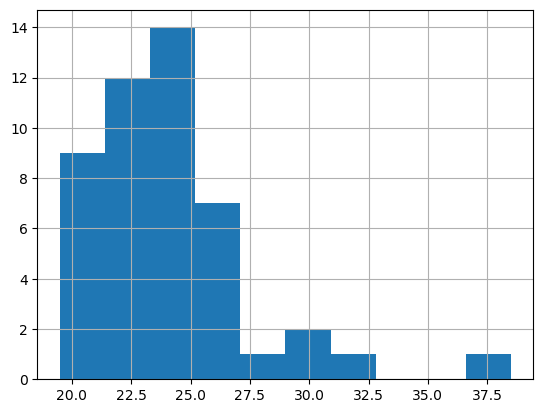

In [23]:
mpg_compact.hist()

In [24]:
stats.ttest_1samp(mpg_compact, mpg_mean)

Ttest_1sampResult(statistic=7.896888573132533, pvalue=4.1985637943171486e-10)

In [26]:
if ((p/2) < 𝜶) and t > 0:
    print('We reject the H₀')
else:
    print('We fail to reject the H₀')

We fail to reject the H₀


 - Do manual cars get better gas mileage than automatic cars?

$H_0$: MPG for manual cars <= mpg for automatic cars<br>
$H_a$: MPG for manual cars > mpg for automatic cars

In [27]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   manufacturer     234 non-null    object 
 1   model            234 non-null    object 
 2   displ            234 non-null    float64
 3   year             234 non-null    int64  
 4   cyl              234 non-null    int64  
 5   trans            234 non-null    object 
 6   drv              234 non-null    object 
 7   cty              234 non-null    int64  
 8   hwy              234 non-null    int64  
 9   fl               234 non-null    object 
 10  class            234 non-null    object 
 11  fuel_efficiency  234 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 23.8+ KB


In [28]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_efficiency
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [29]:
mpg['trans'].unique()

array(['auto(l5)', 'manual(m5)', 'manual(m6)', 'auto(av)', 'auto(s6)',
       'auto(l4)', 'auto(l3)', 'auto(l6)', 'auto(s5)', 'auto(s4)'],
      dtype=object)

In [30]:
manual_cars = mpg[mpg['trans'].str.contains('m')]
automatic_cars = mpg[mpg['trans'].str.contains('auto')]

manual_cars.trans.count(), automatic_cars.trans.count()

(77, 157)

In [31]:
mpg_manuals = manual_cars.fuel_efficiency
mpg_automatic = automatic_cars.fuel_efficiency

<AxesSubplot:>

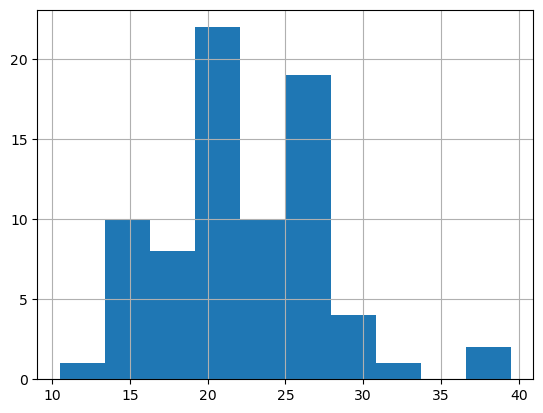

In [32]:
mpg_manuals.hist()

<AxesSubplot:>

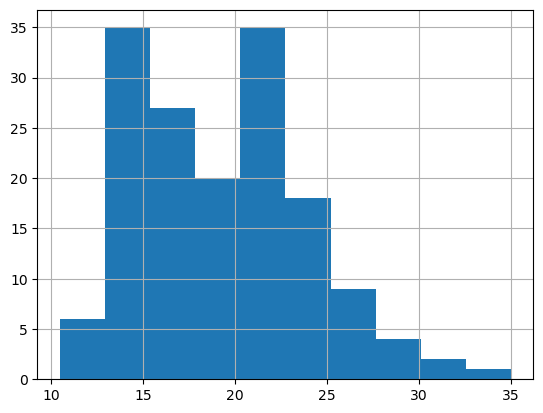

In [33]:
mpg_automatic.hist()

In [34]:
mpg_manuals.var(), mpg_automatic.var()

(26.635167464114826, 21.942777233382337)

In [35]:
stats.levene(mpg_manuals, mpg_automatic)

LeveneResult(statistic=0.20075824847529639, pvalue=0.6545276355131857)

In [36]:
t, p = stats.ttest_ind(mpg_manuals, mpg_automatic, equal_var=True)
t, p/2

(4.593437735750014, 3.5771872005728424e-06)

In [37]:
mpg_manuals.mean(), mpg_automatic.mean()

(22.227272727272727, 19.130573248407643)

In [38]:
if (p/2 < 𝜶) and t > 0:
    print('We reject the H₀')
else:
    print('We fail to reject the H₀')

We reject the H₀


# Correlation exercises

## 1. Answer with the type of stats test you would use (assume normal distribution):
 - Is there a relationship between the length of your arm and the length of your foot?
 - Do guys and gals quit their jobs at the same rate?
 - Does the length of time of the lecture correlate with a students grade?

In [ ]:
# Pearsons's R / Spearmans
# Independent t-test (2-tailed)
# Pearsons's R / Spearmans

## 2. Use the telco_churn data.
 - Does tenure correlate with monthly charges?

In [3]:
import env
import os

def get_db_url(db, env_file = os.path.exists('env.py')): 
   
    if env_file:
        username, password, host = (env.username, env.password, env.host)
        return f'mysql+pymysql://{username}:{password}@{host}/{db}'
    
    else:
    
        return 'hello, you need a password to get in!'

# pd.options.display.max_columns = None  

In [45]:
# made our query and url to access the data from SQL 

url = get_db_url('telco_churn')
query = '''
SELECT *
FROM customers;
'''
customers = pd.read_sql(query, url)

customers.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes


1. State our hypothesis, set our alpha
2. Select the data, check for nulls
3. Plot the data
4. Test for assumptions (normal distribtion for correlation)
5. Run test
6. Draw conclusions


$H_0$: There is no linear correlation between tenure and monthly charges<br>
$H_a$: There is a linear correlation between tenure and monthly charges

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   monthly_charges  7043 non-null   float64
 1   tenure           7043 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 110.2 KB


<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

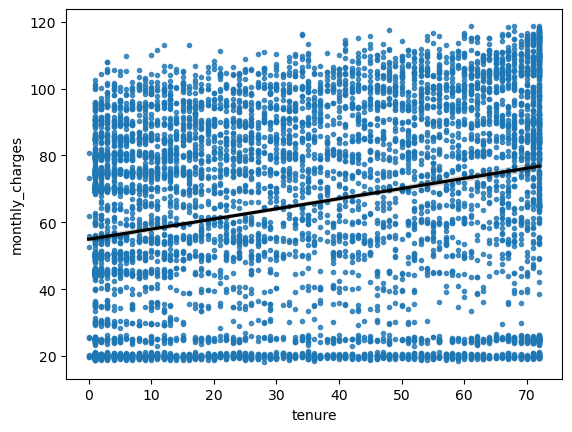

In [61]:
# formed hypothesis
# Gathered the necessary data for the question and then plotted using seaborn

charges_df = customers[['monthly_charges', 'tenure']]
charges_df.info()
sns.regplot(x = 'tenure', y = 'monthly_charges', data = charges_df, marker = '.', line_kws= {'color': 'black'})

<AxesSubplot:>

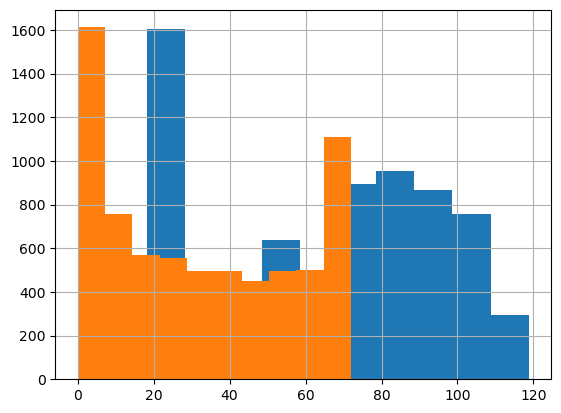

In [62]:
#distribution normailty
charges_df.monthly_charges.hist()
charges_df.tenure.hist()

In [66]:
# alpha and used spearman's method to run our test 
𝜶 = 0.05

r , p = stats.spearmanr(charges_df.tenure, charges_df.monthly_charges)
    
r , p     

(0.27641678933130215, 1.0271266876409408e-123)

In [67]:
# our conculsion 

if p < 𝜶:
    print("We reject H₀")
else:
    print("We fail to reject H₀")

We reject H₀


We reject H₀ There is a linear correlation between tenure and monthly charges

**Takeaways**

There is a correlation between monthly charges and tenure. <br>
With an r of .28, the correlation is weak to moderate

# - Does tenure correlate with total charges?

$H_0$: There is no linear correlation between tenure and total charges<br>
$H_a$: There is a linear correlation between tenure and total charges

In [113]:
# formed hypotheses
# alpha and collected our data for the problem using df's
𝜶 = 0.05

total_charges_df = customers[['tenure', 'total_charges']]

total_charges_df.info()
total_charges_df.total_charges.sort_values()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tenure         7043 non-null   int64 
 1   total_charges  7043 non-null   object
dtypes: int64(1), object(1)
memory usage: 110.2+ KB


2855          
3118          
3052          
5433          
1731          
         ...  
5868    997.75
4298     998.1
4173    999.45
3162     999.8
6421     999.9
Name: total_charges, Length: 7043, dtype: object

In [114]:
# convert some of our data from str to floats to be able to some linear correlation statistics

total_charges_df['total_charges']= total_charges_df['total_charges'].str.replace(' ', '0').astype('float')

/var/folders/wb/jmvhr1254qz8q35w554cyxww0000gn/T/ipykernel_3510/306546146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_charges_df['total_charges']= total_charges_df['total_charges'].str.replace(' ', '0').astype('float')


In [115]:
total_charges_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tenure         7043 non-null   int64  
 1   total_charges  7043 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 110.2 KB


In [116]:
total_charges_df

,tenure,total_charges
0,9,593.30
1,9,542.40
2,4,280.85
3,13,1237.85
4,3,267.40
...,...,...
7038,13,742.90
7039,22,1873.70
7040,2,92.75
7041,67,4627.65


<AxesSubplot:xlabel='tenure', ylabel='total_charges'>

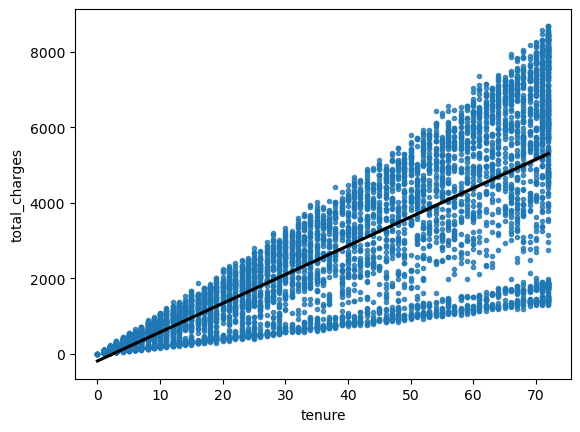

In [117]:
sns.regplot(x = 'tenure', y = 'total_charges', data = total_charges_df, marker = '.', line_kws= {'color': 'black'})

<AxesSubplot:>

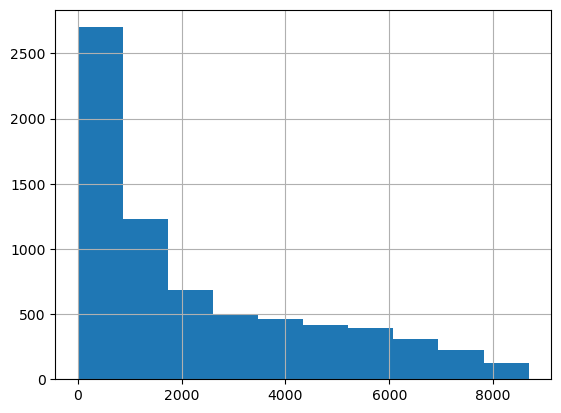

In [122]:
total_charges_df.total_charges.hist()

<AxesSubplot:>

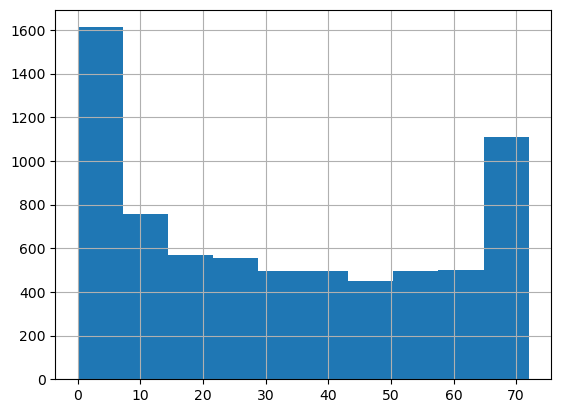

In [121]:
total_charges_df.tenure.hist()

In [123]:
# ran our test using spearman's to find our r and p-value
𝜶 = 0.05
r, p = stats.spearmanr(total_charges_df.tenure, total_charges_df.total_charges)

r, p 

(0.8896957900597577, 0.0)

In [119]:
# concluded with rejecting our Null
if p < 𝜶:
    print("We reject H₀")
else:
    print("We fail to reject H₀")

We reject H₀


**Takeaways**

There is a liner correalation between tenure and total charges<br>
With an r of .89, the correlation is strong 

## - What happens if you control for phone and internet service?

Of customers who have only phone service: <br>
$H_0$: There is no linear correlation between tenure and monthly charges<br>
$H_a$: There is a linear correlation between tenure and monthly charges

In [124]:
𝜶 = 0.05

In [127]:
# formed hypothesis
# alpha 
# gathered data for customers who have a phone service
phone_df = customers[(customers.phone_service == 'Yes') & (customers.internet_service_type_id == 1)][['tenure', 'monthly_charges']]

In [129]:
phone_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1739 entries, 0 to 7041
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tenure           1739 non-null   int64  
 1   monthly_charges  1739 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 40.8 KB


In [128]:
phone_df.head()

,tenure,monthly_charges
0,9,65.60
1,9,59.90
5,9,69.40
8,7,48.20
9,65,90.45


<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

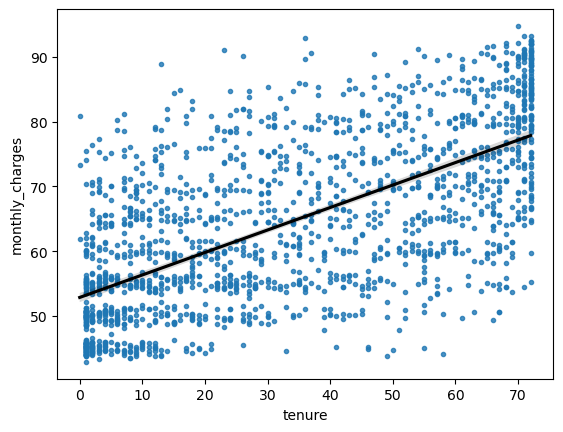

In [130]:
sns.regplot(x = 'tenure', y = 'monthly_charges', data = phone_df, marker = '.', line_kws= {'color': 'black'})

<AxesSubplot:>

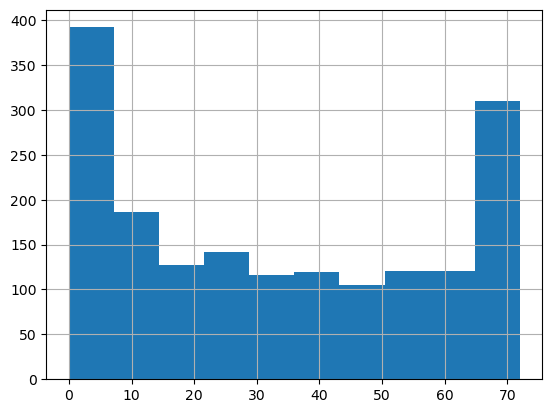

In [131]:
phone_df.tenure.hist()

<AxesSubplot:>

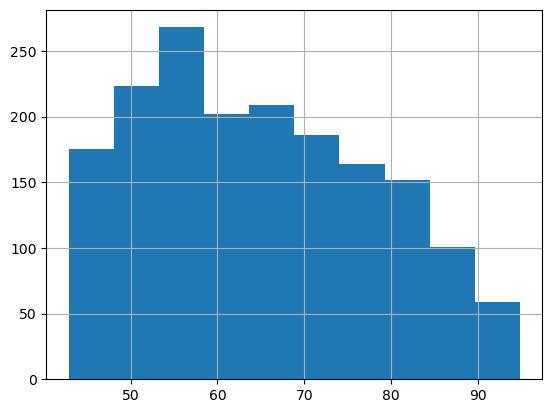

In [132]:
phone_df.monthly_charges.hist()

In [134]:
# ran our test using the spearman's method; our r valvue indicating theres a strong correlation with our p-value confirming theres a relationship
r, p = stats.spearmanr(phone_df.tenure, phone_df.monthly_charges)

r, p

(0.6644708508462759, 5.423601644635052e-222)

In [135]:
# conclusion for our test, we rejected our Null
if p < 𝜶:
    print("We reject H₀")
else:
    print("We fail to reject H₀")

We reject H₀


**Takeaways**

We reject H₀ There is a linear correlation between tenure and monthly charges for phone service control 

There is a moderate-strong correlation between tenure and monthly charges for customers who have only phone service.  

## 3. Use the employees database.
 - Is there a relationship between how long an employee has been with the company and their salary?

In [142]:
url = get_db_url('employees')

query ='''
SELECT *
FROM employees
JOIN salaries USING(emp_no)
WHERE to_date = '9999-01-01';
'''

In [143]:
df = pd.read_sql(query, url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   emp_no      240124 non-null  int64 
 1   birth_date  240124 non-null  object
 2   first_name  240124 non-null  object
 3   last_name   240124 non-null  object
 4   gender      240124 non-null  object
 5   hire_date   240124 non-null  object
 6   salary      240124 non-null  int64 
 7   from_date   240124 non-null  object
 8   to_date     240124 non-null  object
dtypes: int64(2), object(7)
memory usage: 16.5+ MB


$H_0$: There is no linear correlation between employee tenure and salary<br>
$H_a$: There is a linear correlation between employee tenure and salary

In [144]:
𝜶 = 0.05

In [153]:
df['tenure'] = pd.to_datetime("today") - pd.to_datetime(df.hire_date)

df['tenure'] = df.tenure.astype('str').str.split(' ', expand = True)[0].astype('int')

In [156]:
# df.info()
tenure_df = df[['tenure', 'salary']]
tenure_df

,tenure,salary
0,13311,88958
1,13528,72527
2,13248,43311
3,13153,74057
4,12137,94692
...,...,...
240119,10919,52868
240120,11757,69501
240121,13377,83441
240122,10645,55003


<AxesSubplot:xlabel='tenure', ylabel='salary'>

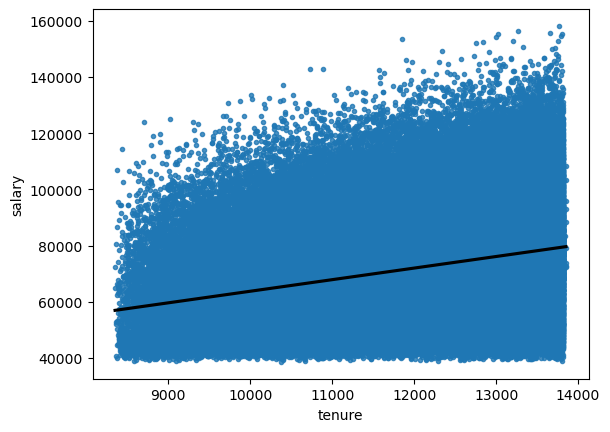

In [157]:
sns.regplot(x = 'tenure', y = 'salary', data = tenure_df, marker = '.', line_kws= {'color': 'black'})

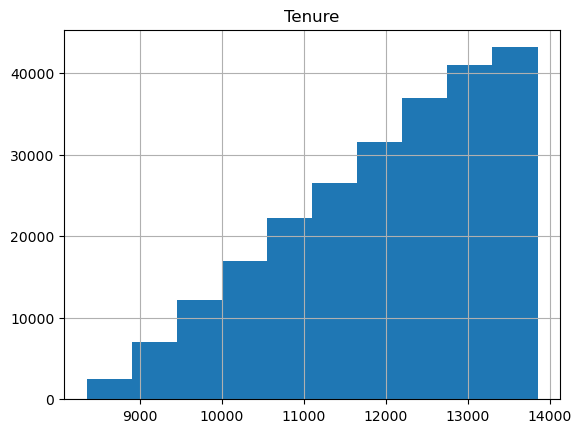

Text(0.5, 1.0, 'Salary')

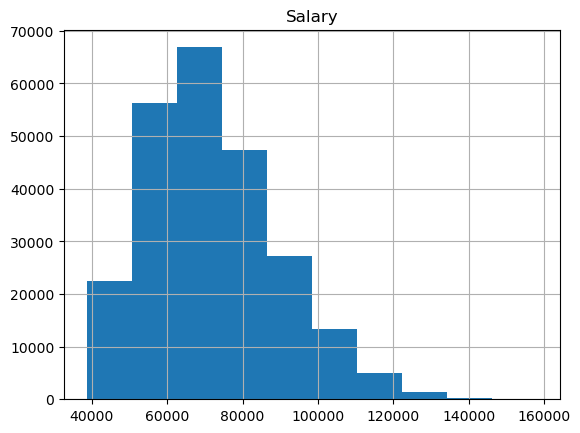

In [164]:
tenure_df.tenure.hist()
plt.title('Tenure')
plt.show()
tenure_df.salary.hist()
plt.title('Salary')

In [165]:
r, p = stats.spearmanr(tenure_df.tenure, tenure_df.salary)

r, p


(0.3128783525010577, 0.0)

In [166]:
if p < 𝜶:
    print("We reject H₀")
else:
    print("We fail to reject H₀")

We reject H₀


**Takeaways**

There is a moderate correlation between tenure and salary. 

### - Is there a relationship between how long an employee has been with the company and the number of titles they have had?

$H_0$: There is no linear correlation between tenure and number of titles<br>
$H_a$: There is a linear correlation between tenure and nummber of titles

In [167]:
𝜶 = 0.05

In [168]:
url = get_db_url('employees')

query = '''SELECT emp_no, count(title) AS num_titles, te.tenure
FROM titles AS t
JOIN (SELECT emp_no, datediff(now(), min(`from_date`)) AS tenure
FROM titles
GROUP BY emp_no
HAVING max(to_date) = '9999-01-01'
) AS te USING(emp_no)
group by t.emp_no;
'''

df = pd.read_sql(query,url)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   emp_no      240124 non-null  int64
 1   num_titles  240124 non-null  int64
 2   tenure      240124 non-null  int64
dtypes: int64(3)
memory usage: 5.5 MB


<AxesSubplot:xlabel='tenure', ylabel='num_titles'>

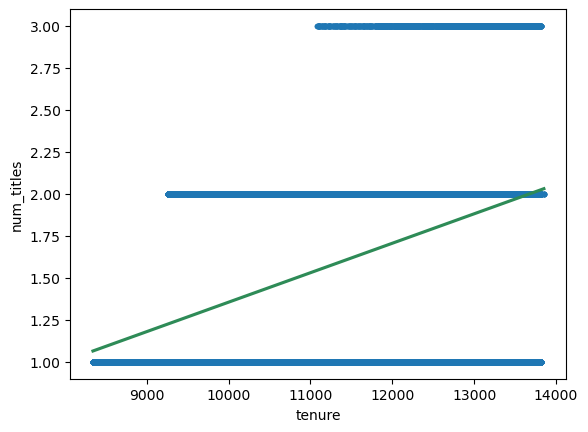

In [170]:
# we plotted using seaborn to viz our data correlation, but relaized it was not the best method to figure out our answer. 

df = df[['num_titles', 'tenure']]

sns.regplot(x = 'tenure', y = 'num_titles', data = df, marker = '.', line_kws= {'color': 'seagreen'})

Because number of titles is a discrete value we should run an ANOA test.

Assumptions: Do they have equal variance, do they have enough obervations, and are they independent?

In [171]:
#observations:
df.num_titles.value_counts()

2    125345
1    111892
3      2887
Name: num_titles, dtype: int64

In [174]:
# equal variance
# H_0 the variance is equal
# H_a the variance are significantly different 
stats.levene(df.num_titles, df.tenure)

LeveneResult(statistic=718602.1569097865, pvalue=0.0)

In [175]:
stats.kruskal(df.num_titles, df.tenure)

KruskalResult(statistic=371488.64419334417, pvalue=0.0)

**Takeaway**

There is a difference in tenure and number of titles 

## 4. Use the sleepstudy data.
 - Is there a relationship between days and reaction time?

In [178]:
df = data('sleepstudy')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
 2   Subject   180 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 5.6 KB


$H_0$: There is no linear correlation between days and reaction time<br>
$H_a$: There is a linear correlation between days and reaction time

In [179]:
df = df[['Reaction', 'Days']]

<AxesSubplot:xlabel='Days', ylabel='Reaction'>

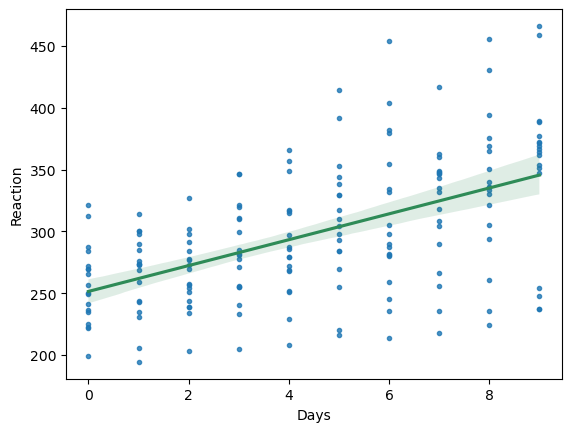

In [180]:
sns.regplot(x = 'Days', y = 'Reaction', data = df, marker = '.', line_kws= {'color': 'seagreen'})

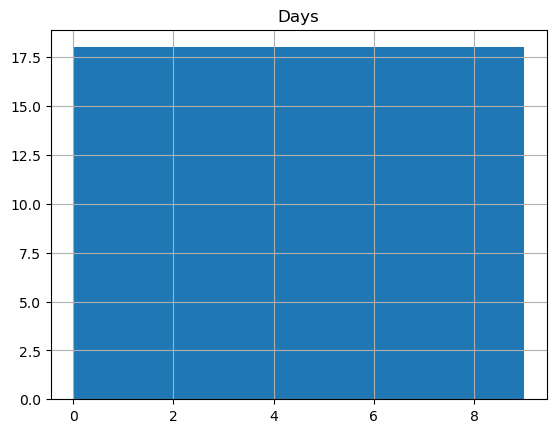

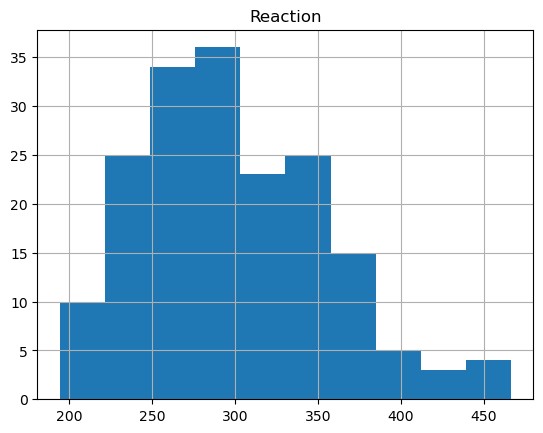

In [184]:
df.Days.hist()
plt.title("Days")
plt.show()
df.Reaction.hist()
plt.title('Reaction')
plt.show()

In [186]:
r, p = stats.spearmanr(df.Days, df.Reaction)

r, p 

(0.5228138502259547, 5.132878057706873e-14)

In [187]:
# concluded that we rejected the Null meaning theres a correlation between our subjects
if p < 𝜶:
    print("We reject H₀")
else:
    print("We fail to reject H₀")

We reject H₀


**Takeaway**

There is a moderate corrleation between days and reaction time 

# $chi^2$ Exercises
1. Answer with the type of stats test you would use (assume normal distribution):

 - Do students get better test grades if they have a rubber duck on their desk?
 - Does smoking affect when or not someone has lung cancer?
 - Is gender independent of a person’s blood type?
 - A farming company wants to know if a new fertilizer has improved crop yield or not
 - Does the length of time of the lecture correlate with a students grade?
 - Do people with dogs live in apartments more than people with cats?

In [41]:
#1 tail t-test
#Chi^2
#Chi^2
#Chi^2
#Pearson's R
#Chi^2


 2. Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.
 
    |               &nbsp;     | Codeup Student | Not Codeup Student |
    | --------------------- | -------------- | ------------------ |
    | Uses a Macbook        | 49             | 20                 |
    | Doesn't Use A Macbook | 1              | 30                 |


$H_0$: There is no relationship between being a codeup student and using a macbook <br>
$H_a$: There is an relationship between being a codeup student and using a macbook

In [190]:
𝜶 = 0.05

In [191]:
observed = [[49,20],[1,30]]

observed = pd.DataFrame(observed)
observed


,0,1
0,49,20
1,1,30


In [193]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

chi2, p, degf, expected

(36.65264142122487,
 1.4116760526193828e-09,
 1,
 array([[34.5, 34.5],
        [15.5, 15.5]]))

In [197]:
print('Observed Values\n')
print(observed.values)
print('---\nExpected Values\n')
print(expected.astype(int))
print('---\n')
print(f'chi² = {chi2:.2f}') 
print(f'p     = {p}')

Observed Values

[[49 20]
 [ 1 30]]
---
Expected Values

[[34 34]
 [15 15]]
---

chi² = 36.65
p     = 1.4116760526193828e-09


In [198]:
if p < 𝜶:
    print("We reject H₀")
else:
    print("We fail to reject H₀")

We reject H₀


**Takeaway**

We can see by comparing the contingency table,(and with the data that we have) that there is a relationship between being a codeup student and using a macbook.

## 3. Choose another 2 categorical variables from the mpg dataset and perform a $chi^2$ contingency table test with them. Be sure to state your null and alternative hypotheses.

In [43]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


$H_0$: There is no relationship between manufacturer and cyl <br>
$H_a$: There is a relationship between manufacturer and cyl

In [44]:
𝜶 = 0.05

In [45]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [46]:
mpg.manufacturer.value_counts()

dodge         37
toyota        34
volkswagen    27
ford          25
chevrolet     19
audi          18
hyundai       14
subaru        14
nissan        13
honda          9
jeep           8
pontiac        5
land rover     4
mercury        4
lincoln        3
Name: manufacturer, dtype: int64

In [47]:
mpg.cyl.value_counts()

4    81
6    79
8    70
5     4
Name: cyl, dtype: int64

In [50]:
observed = pd.crosstab(mpg.manufacturer, mpg.cyl)
observed

cyl,4,5,6,8
manufacturer,,,,
audi,8,0,9,1
chevrolet,2,0,3,14
dodge,1,0,15,21
ford,0,0,10,15
honda,9,0,0,0
hyundai,8,0,6,0
jeep,0,0,3,5
land rover,0,0,0,4
lincoln,0,0,0,3


In [51]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

chi2, p, degf, expected

(198.11753580416368,
 4.0518621792685397e-22,
 42,
 array([[ 6.23076923,  0.30769231,  6.07692308,  5.38461538],
        [ 6.57692308,  0.32478632,  6.41452991,  5.68376068],
        [12.80769231,  0.63247863, 12.49145299, 11.06837607],
        [ 8.65384615,  0.42735043,  8.44017094,  7.47863248],
        [ 3.11538462,  0.15384615,  3.03846154,  2.69230769],
        [ 4.84615385,  0.23931624,  4.72649573,  4.18803419],
        [ 2.76923077,  0.13675214,  2.7008547 ,  2.39316239],
        [ 1.38461538,  0.06837607,  1.35042735,  1.1965812 ],
        [ 1.03846154,  0.05128205,  1.01282051,  0.8974359 ],
        [ 1.38461538,  0.06837607,  1.35042735,  1.1965812 ],
        [ 4.5       ,  0.22222222,  4.38888889,  3.88888889],
        [ 1.73076923,  0.08547009,  1.68803419,  1.4957265 ],
        [ 4.84615385,  0.23931624,  4.72649573,  4.18803419],
        [11.76923077,  0.58119658, 11.47863248, 10.17094017],
        [ 9.34615385,  0.46153846,  9.11538462,  8.07692308]]))

In [52]:
print('Observed Values\n')
print(observed.values)
print('---\nExpected Values\n')
print(expected.astype(int))
print('---\n')
print(f'chi² = {chi2:.2f}') 
print(f'p     = {p}')

Observed Values

[[ 8  0  9  1]
 [ 2  0  3 14]
 [ 1  0 15 21]
 [ 0  0 10 15]
 [ 9  0  0  0]
 [ 8  0  6  0]
 [ 0  0  3  5]
 [ 0  0  0  4]
 [ 0  0  0  3]
 [ 0  0  2  2]
 [ 4  0  8  1]
 [ 0  0  4  1]
 [14  0  0  0]
 [18  0 13  3]
 [17  4  6  0]]
---
Expected Values

[[ 6  0  6  5]
 [ 6  0  6  5]
 [12  0 12 11]
 [ 8  0  8  7]
 [ 3  0  3  2]
 [ 4  0  4  4]
 [ 2  0  2  2]
 [ 1  0  1  1]
 [ 1  0  1  0]
 [ 1  0  1  1]
 [ 4  0  4  3]
 [ 1  0  1  1]
 [ 4  0  4  4]
 [11  0 11 10]
 [ 9  0  9  8]]
---

chi² = 198.12
p     = 4.0518621792685397e-22


In [53]:
if p < 𝜶:
    print("We reject H₀")
else:
    print("We fail to reject H₀")

We reject H₀


**Takeaway**

We can see by comparing the contingency table,(and with the data that we have) that there is an association between the manufacturer and cyl type.

## 4. Use the data from the employees database to answer these questions:
 - Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

In [9]:
url = get_db_url('employees')

query = '''
SELECT concat(first_name,' ', last_name) AS full_name, gender, dept_name
FROM employees AS e
JOIN dept_emp AS de USING(emp_no) 
JOIN departments AS d USING(dept_no)
WHERE to_date = '9999-01-01' AND dept_name in ('Marketing','Sales');
'''

df = pd.read_sql(query,url)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52543 entries, 0 to 52542
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_name  52543 non-null  object
 1   gender     52543 non-null  object
 2   dept_name  52543 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


In [10]:
df.head()

,full_name,gender,dept_name
0,Cristinel Bouloucos,F,Marketing
1,Berhard McFarlin,M,Marketing
2,Yucel Auria,F,Marketing
3,Karoline Cesareni,F,Marketing
4,Nikolaos Llado,F,Marketing


In [11]:
df['dept_name'].value_counts()

Sales        37701
Marketing    14842
Name: dept_name, dtype: int64

In [12]:
df['gender'].value_counts()

M    31680
F    20863
Name: gender, dtype: int64

$H_0$: There is no relationship between being a persons gender and being in sales/marketing

$H_a$: There is a relationship between being a persons gender and being in sales/marketing

In [13]:
observed = pd.crosstab(df.gender, df.dept_name)

observed

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [14]:
𝜶 = .05

chi2, p, degf, expected = stats.chi2_contingency(observed)

chi2, p, degf, expected

(0.3240332004060638,
 0.5691938610810126,
 1,
 array([[ 5893.2426013, 14969.7573987],
        [ 8948.7573987, 22731.2426013]]))

In [15]:
print('Observed Values\n')
print(observed.values)
print('---\nExpected Values\n')
print(expected.astype(int))
print('---\n')
print(f'chi² = {chi2:.2f}') 
print(f'p     = {p}')

Observed Values

[[ 5864 14999]
 [ 8978 22702]]
---
Expected Values

[[ 5893 14969]
 [ 8948 22731]]
---

chi² = 0.32
p     = 0.5691938610810126


In [16]:
if p < 𝜶:
    print("We reject H₀")
else:
    print("We fail to reject H₀")

We fail to reject H₀


**Takeaways**

We fail to reject H₀, there is no relationship between being a persons gender and being in sales/marketing

## - Is an employee's gender independent of whether or not they are or have been a manager?

In [21]:
url = get_db_url('employees')

query = '''
Select e.emp_no, e.gender, dm.dept_no
FROM employees AS e
LEFT JOIN dept_manager as dm USING(emp_no);
'''

df = pd.read_sql(query, url)
df.head()

,emp_no,gender,dept_no
0,10001,M,None
1,10002,F,None
2,10003,M,None
3,10004,M,None
4,10005,M,None


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   emp_no   300024 non-null  int64 
 1   gender   300024 non-null  object
 2   dept_no  24 non-null      object
dtypes: int64(1), object(2)
memory usage: 6.9+ MB


In [40]:
df.dept_no.value_counts(dropna=False)
df.dept_no = df.dept_no.fillna('not manager')
df.dept_no.value_counts()

not manager    300000
d004                4
d006                4
d009                4
d001                2
d002                2
d003                2
d005                2
d007                2
d008                2
Name: dept_no, dtype: int64

In [61]:
df.dept_no = np.where( df.dept_no != 'not manager', 'manager', 'not manager')

$H_0$: There is no relationship between a gender and being or have been  a manager<br>
$H_a$: There is a relationship between a gender and being or have been a manager

In [57]:
observed = pd.crosstab(df.gender, df.dept_no)
observed


dept_no,manager,not manager
gender,,
F,13,120038
M,11,179962


In [58]:
𝜶 = .05

chi2, p, degf, expected = stats.chi2_contingency(observed)

chi2, p, degf, expected

(1.4566857643547197,
 0.22745818732810363,
 1,
 array([[9.60331174e+00, 1.20041397e+05],
        [1.43966883e+01, 1.79958603e+05]]))

In [59]:
print('Observed Values\n')
print(observed.values)
print('---\nExpected Values\n')
print(expected.astype(int))
print('---\n')
print(f'chi² = {chi2:.2f}') 
print(f'p     = {p}')

Observed Values

[[    13 120038]
 [    11 179962]]
---
Expected Values

[[     9 120041]
 [    14 179958]]
---

chi² = 1.46
p     = 0.22745818732810363


In [60]:
if p < 𝜶:
    print("We reject H₀")
else:
    print("We fail to reject H₀")

We fail to reject H₀


**Takeaways**

We fail to reject H₀, there is no relationship between a gender and being a past or present manager